# **Prediksi Harga Penutupan Saham BBCA**
---
# **Pendahuluan**
## **Latar Belakang**
Investasi di pasar saham telah menjadi salah satu pilihan populer dalam pengelolaan keuangan masyarakat modern. Dalam pasar saham, salah satu aspek yang menjadi perhatian utama investor adalah harga penutupan (closing price), karena mencerminkan nilai akhir dari saham pada akhir sesi perdagangan. Harga penutupan sering kali menjadi dasar untuk analisis teknikal, pembuatan keputusan investasi, dan penentuan tren harga di masa depan.

PT Bank Central Asia Tbk (BBCA) adalah salah satu emiten dengan kapitalisasi pasar terbesar di Indonesia dan memiliki likuiditas tinggi. Saham BBCA sering menjadi perhatian investor individu maupun institusi, menjadikannya subjek analisis yang menarik. Memahami dan memprediksi harga penutupan saham BBCA dapat membantu investor dalam mengambil keputusan investasi yang lebih terinformasi, baik untuk jangka pendek maupun panjang.

## **Pernyataan Masalah**
1.   Bagaimana cara membangun model yang akurat dalam memprediksi harga penutupan saham BBCA?

## **Tujuan**
Memprediksi harga penutupan saham BBCA dengan akurasi tinggi, guna mendukung pengambilan keputusan investasi yang lebih baik.

# **Metodologi Penelitian**
## **Pemahaman Data**
---
Saya menggunakan data historis saham BBCA dari website Investing.com, dengan cakupan waktu dari tahun 2016 hingga 2024 dengan interval mingguan. Data ini mencakup harga pembukaan, tertinggi, terendah, volume perdagangan, serta harga penutupan saham. Model prediksi ini bertujuan untuk meramalkan harga penutupan saham BBCA berdasarkan informasi tersebut.

Harga penutupan dipilih karena menjadi indikator utama yang mencerminkan nilai akhir transaksi dalam satu periode, serta digunakan oleh investor sebagai acuan untuk mengevaluasi performa saham dan tren pasar.

Dengan menggunakan data mingguan, analisis ini bertujuan untuk memberikan prediksi yang lebih stabil dan relevan bagi investor dalam pengambilan keputusan investasi jangka menengah hingga panjang. Model ini diharapkan dapat membantu memaksimalkan keuntungan dan meminimalkan risiko investasi.


#### **Pengumpulan Data**


Import libary yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

Mengambil data yang sudah saya upload ke github

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/alihasan313/psd/main/bbca_2016-2024.csv')
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.
0,2024-01-07,9700,9600,9700,9475,283350000
1,2023-12-31,9575,9400,9600,9325,227730000
2,2023-12-24,9400,9375,9450,9325,222340000
3,2023-12-17,9325,9200,9350,9125,424760000
4,2023-12-10,9225,8675,9225,8675,632190000
...,...,...,...,...,...,...
379,2016-09-04,3010,3055,3060,2990,457660000
380,2016-08-28,3000,3045,3060,2970,400520000
381,2016-08-21,3040,3080,3100,2995,419080000
382,2016-08-14,3060,3030,3090,3000,519890000


#### Informasi Dataset

In [239]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tanggal    384 non-null    object
 1   Terakhir   384 non-null    int64 
 2   Pembukaan  384 non-null    int64 
 3   Tertinggi  384 non-null    int64 
 4   Terendah   384 non-null    int64 
 5   Vol.       384 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.1+ KB


,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.
count,384.000000,384.000000,384.000000,384.000000,3.840000e+02
mean,6119.361979,6108.229167,6241.679688,5985.898438,3.967283e+08
std,1854.925606,1851.384949,1878.575645,1830.512787,1.652424e+08
min,2890.000000,2860.000000,2955.000000,2790.000000,7.262000e+07
25%,4660.000000,4671.250000,4758.750000,4527.500000,2.918475e+08
50%,6142.500000,6105.000000,6240.000000,6000.000000,3.671950e+08
75%,7537.500000,7556.250000,7712.500000,7350.000000,4.534700e+08
max,9700.000000,9600.000000,9700.000000,9475.000000,1.460000e+09


| Atribut    | Keterangan                                                                 |
|------------|-----------------------------------------------------------------------------|
| **Tanggal** | Tanggal tercatatnya data saham.                                             |
| **Terakhir** | Harga penutupan yang tercatat saat pasar saham ditutup (biasanya pada hari Jumat). |
| **Pembukaan** | Harga pembukaan yang tercatat saat pasar saham dibuka pada hari Senin.   |
| **Tertinggi** | Harga tertinggi yang tercatat selama periode pasar saham dibuka pada minggu tersebut. |
| **Terendah** | Harga terendah yang tercatat selama periode pasar saham dibuka pada minggu tersebut. |


In [240]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')  
df.set_index('Tanggal', inplace=True)
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 2016-08-07 to 2024-01-07
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Terakhir   384 non-null    int64
 1   Pembukaan  384 non-null    int64
 2   Tertinggi  384 non-null    int64
 3   Terendah   384 non-null    int64
 4   Vol.       384 non-null    int64
dtypes: int64(5)
memory usage: 18.0 KB


#### Visualiasi Data

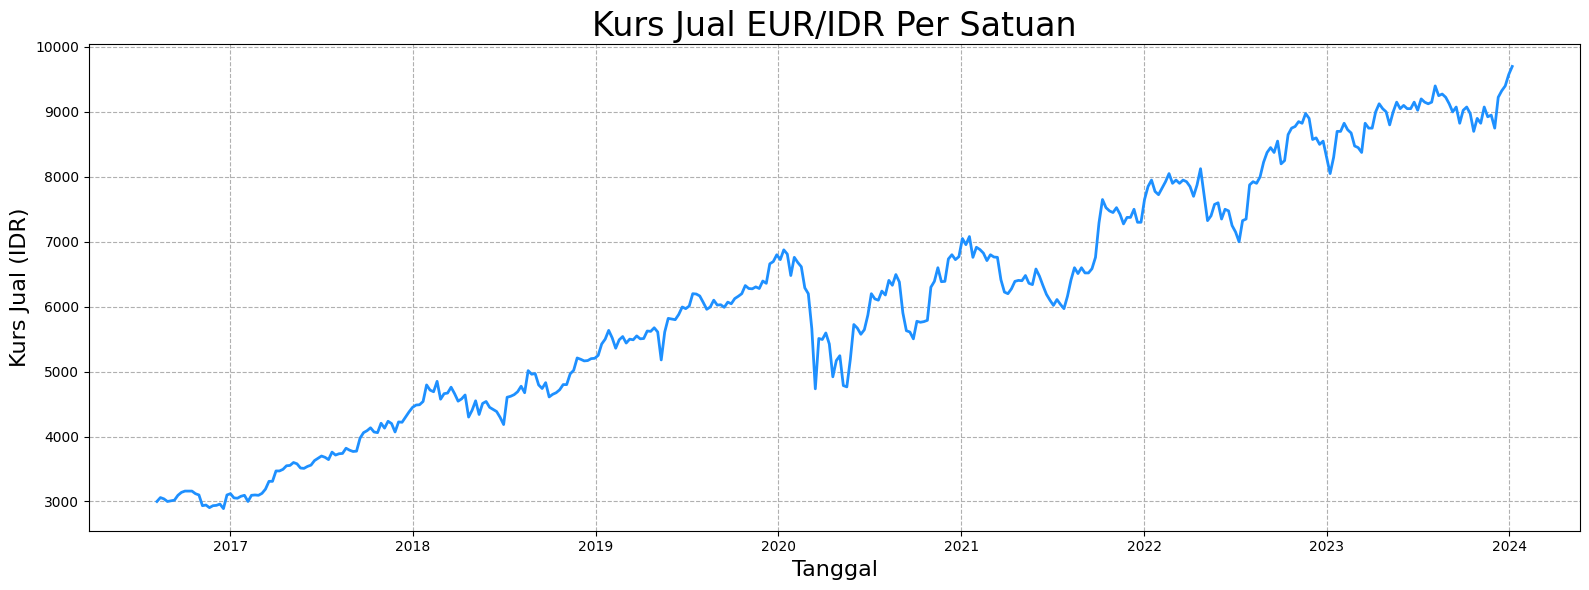

In [241]:
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Terakhir'], color='dodgerblue', linewidth=2)
plt.title('Kurs Jual EUR/IDR Per Satuan', fontsize=24)
plt.xlabel('Tanggal', fontsize=16,)
plt.ylabel('Kurs Jual (IDR)', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


#### **Analisis Korelasi**

           Terakhir  Pembukaan  Tertinggi  Terendah      Vol.
Terakhir   1.000000   0.995745   0.998014  0.997739 -0.089160
Pembukaan  0.995745   1.000000   0.997297  0.997434 -0.084897
Tertinggi  0.998014   0.997297   1.000000  0.996306 -0.060170
Terendah   0.997739   0.997434   0.996306  1.000000 -0.112942
Vol.      -0.089160  -0.084897  -0.060170 -0.112942  1.000000


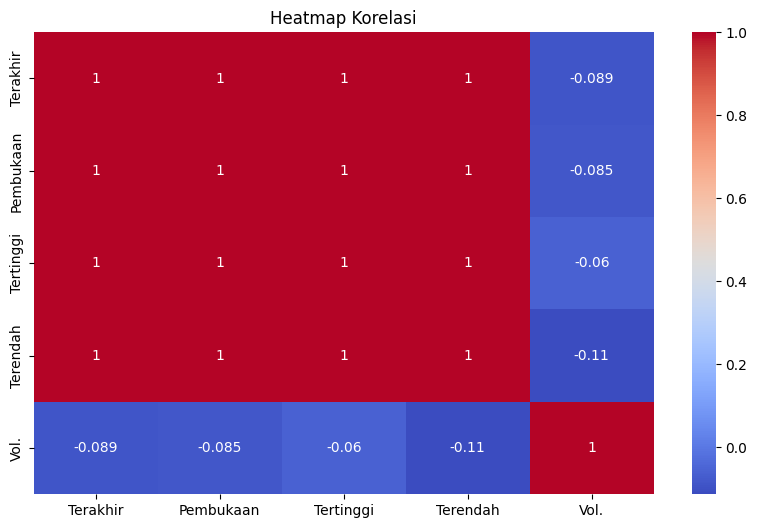

In [242]:
# df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')  
print(df.corr())

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()


* Harga Terakhir memiliki korelasi yang sangat tinggi dengan Pembukaan, Tertinggi, dan Terendah (nilai di atas 0,95) yang berarti bahwa harga penutupan (terakhir) sangat dipengaruhi oleh ketiga harga lainnya.
Selain itu, Pembukaan, Tertinggi, dan Terendah memiliki korelasi yang sangat tinggi (nilai mendekati 1), yang mengindikasikan bahwa harga-harga ini cenderung bergerak ke arah yang sama.

* Volume memiliki korelasi yang sangat lemah atau negatif dengan harga saham lainnya. Hal ini ditunjukkan oleh nilai korelasi yang berkisar antara -0,03 hingga -0,11. Hubungan langsung yang kuat tampaknya tidak ada antara volume transaksi dan harga saham karena bernilai negatif. Jadi, dapat dikatakan bahwa ketika volume transaksi meningkat, harga saham memiliki kecenderungan untuk menurun, namun hubungannya sangat lemah.

#### Mendeteksi Outlier

Visualisasi Outlier dengan Boxplot

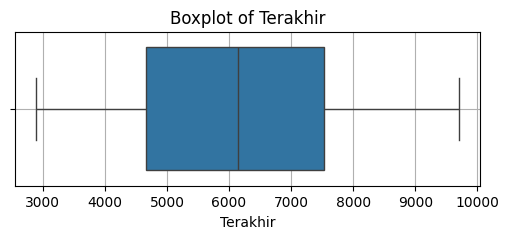

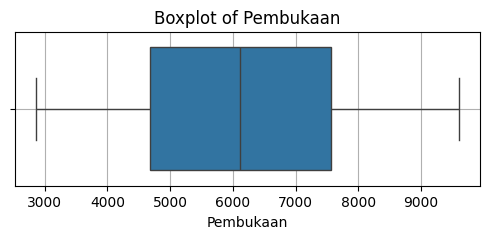

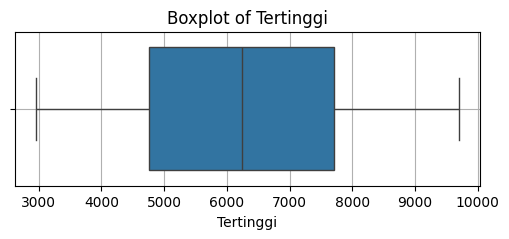

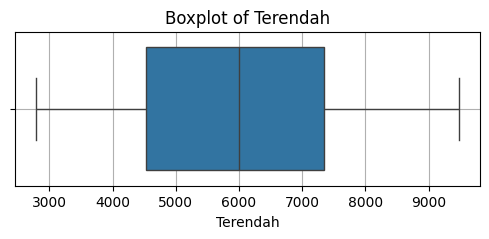

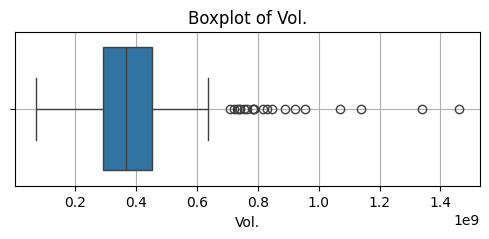

In [243]:
for col in df.columns:
    plt.subplots(figsize=(6, 2))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

Pada boxplot diatas dapat dilihat bahwa terdapat outlier pada volume

Visualisasi Outlier dengan Z-Scores

In [244]:
from scipy import stats

def detect_outliers_zscore(data, column, threshold=3):
    z_scores = stats.zscore(data[column])
    outliers = data[abs(z_scores) > threshold]

    return outliers
outliers_vol = detect_outliers_zscore(df, 'Vol.')
print("Outliers di kolom Volume berdasarkan Z-Score:")
print(outliers_vol)


Outliers di kolom Volume berdasarkan Z-Score:
            Terakhir  Pembukaan  Tertinggi  Terendah        Vol.
Tanggal                                                         
2017-05-28      3510       3535       3590      3430  1460000000
2020-03-15      4735       5660       5660      4325  1140000000
2020-03-22      5510       4760       5895      4405  1070000000
2020-05-24      5190       4775       5320      4775   956480000
2020-09-13      5630       6000       6115      5570   922480000
2022-05-08      7325       7875       7900      7250  1340000000


#### **Mengecek Missing Value**

In [245]:
print(df.isnull().sum())

Terakhir     0
Pembukaan    0
Tertinggi    0
Terendah     0
Vol.         0
dtype: int64


Dapat dilihat bahwa data saya tidak memiliki missing value

## **Pra-Pemprosesan Data**

#### **Konversi Tanggal**
Untuk memudahkan proses analisis data berbasis waktu, atribut tanggal diproses dengan mengubahnya menjadi tipe data datetime dan menjadikannya sebagai index.

In [246]:
# df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')  
# df.set_index('Tanggal', inplace=True)
# df.index = pd.to_datetime(df.index)
# df = df.sort_index()
# df.info()

Tanggal Berhasil diubah ke datetime

Jumlah data sebelum pemrosesan: 384
Jumlah data setelah pemrosesan: 364


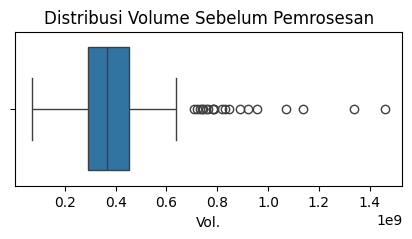

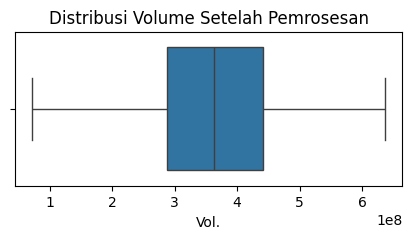

In [5]:
Q1 = df['Vol.'].quantile(0.25)
Q3 = df['Vol.'].quantile(0.75)
IQR = Q3 - Q1   
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['Vol.'] >= lower_bound) & (df['Vol.'] <= upper_bound)]
print(f"Jumlah data sebelum pemrosesan: {df.shape[0]}")
print(f"Jumlah data setelah pemrosesan: {df_cleaned.shape[0]}")


plt.figure(figsize=(5, 2))
sns.boxplot(x=df['Vol.'])
plt.title("Distribusi Volume Sebelum Pemrosesan")
plt.show()

plt.figure(figsize=(5, 2))
sns.boxplot(x=df_cleaned['Vol.'])
plt.title("Distribusi Volume Setelah Pemrosesan")
plt.show()




outlier pada kolom 'Vol.' ditangani menggunakan metode Interquartile Range (IQR). Data yang berada di luar batas bawah dan atas IQR dianggap outlier dan dihapus.



#### **Pembagian Data Latih dan Data Uji**

In [248]:
train_size = int(len(df_cleaned) * 0.8)
train, test = df_cleaned[:train_size], df_cleaned[train_size:]

print(f"Bentuk data latih: {train.shape}")
print(f"Bentuk data uji: {test.shape}")


Bentuk data latih: (291, 5)
Bentuk data uji: (73, 5)


#### **Data untuk Prediksi Multi-Step**

In [249]:
def create_multistep_data(df, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(df)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix < len(df):
            X.append(df.iloc[i:end_ix, :].values) 
            y.append(df.iloc[end_ix:out_end_ix, 0].values) 
    return np.array(X), np.array(y)

n_steps_in, n_steps_out = 5, 2
X_train, y_train = create_multistep_data(train, n_steps_in, n_steps_out)
X_test, y_test = create_multistep_data(test, n_steps_in, n_steps_out)

print(f"Bentuk data latih (X_train): {X_train.shape}, {y_train.shape}")
print(f"Bentuk data uji (X_test): {X_test.shape}, {y_test.shape}")


Bentuk data latih (X_train): (284, 5, 5), (284, 2)
Bentuk data uji (X_test): (66, 5, 5), (66, 2)


#### **Normalisasi**

In [250]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = X_train.reshape((X_train.shape[0] * X_train.shape[1], X_train.shape[2]))
X_test_scaled = X_test.reshape((X_test.shape[0] * X_test.shape[1], X_test.shape[2]))

X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

X_train_scaled = X_train_scaled.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test_scaled = X_test_scaled.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

print(f"Bentuk data latih setelah normalisasi: {X_train_scaled.shape}")
print(f"Bentuk data uji setelah normalisasi: {X_test_scaled.shape}")


Bentuk data latih setelah normalisasi: (284, 5, 5)
Bentuk data uji setelah normalisasi: (66, 5, 5)



Hasil Evaluasi untuk Prediksi Multi-Step:
Rata-rata MAE: 171.2280
Rata-rata RMSE: 214.8853
Rata-rata R2: 0.5198
Rata-rata MAPE: 1.94%


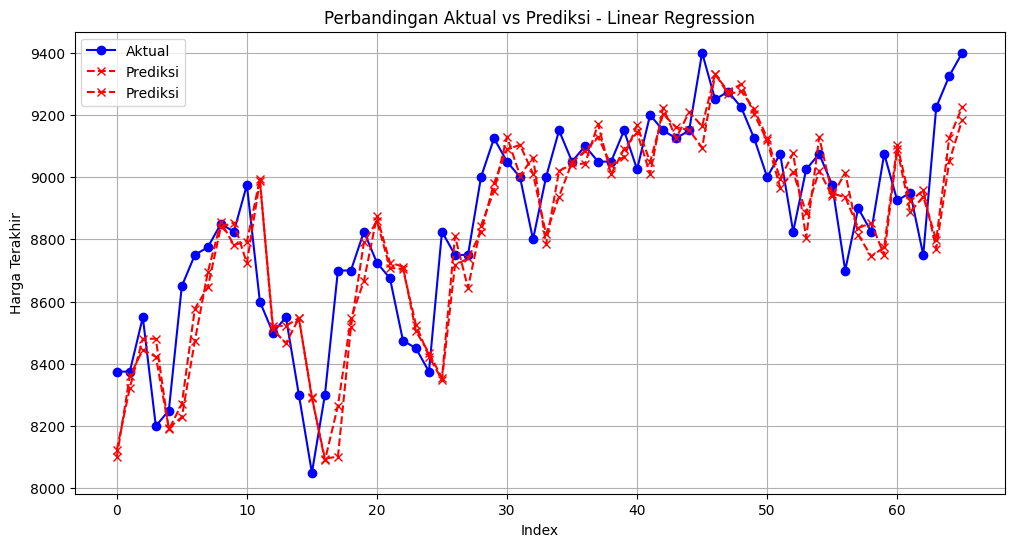

In [251]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

steps = 2
mae_list, rmse_list, r2_list, mape_list = [], [], [], []

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_pred_list = []
for step in range(steps):
    lr_model = LinearRegression()

    if len(X_train.shape) == 3:
        X_train_flat = X_train.reshape((X_train.shape[0], -1))
    else:
        X_train_flat = X_train

    if len(y_train.shape) == 3:
        y_train_flat = y_train[:, step].reshape(-1, 1)
    else:
        y_train_flat = y_train

    lr_model.fit(X_train_flat, y_train_flat)

    if len(X_test.shape) == 3:
        X_test_flat = X_test.reshape((X_test.shape[0], -1))
    else:
        X_test_flat = X_test

    y_pred = lr_model.predict(X_test_flat)
    y_pred_list.append(y_pred)

    y_test_step = y_test[:, step]

    mae = mean_absolute_error(y_test_step, y_pred[:, 0])
    rmse = np.sqrt(mean_squared_error(y_test_step, y_pred[:, 0]))
    r2 = r2_score(y_test_step, y_pred[:, 0])
    mape = mean_absolute_percentage_error(y_test_step, y_pred[:, 0])

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)
    mape_list.append(mape)

print("\nHasil Evaluasi untuk Prediksi Multi-Step:")
print(f"Rata-rata MAE: {np.mean(mae_list):.4f}")
print(f"Rata-rata RMSE: {np.mean(rmse_list):.4f}")
print(f"Rata-rata R2: {np.mean(r2_list):.4f}")
print(f"Rata-rata MAPE: {np.mean(mape_list):.2f}%")

plt.figure(figsize=(12,6))
plt.plot(y_test[:, 0], label="Aktual", color='blue', linestyle='-', marker='o')
plt.plot(y_pred_list[0], label="Prediksi", color='red', linestyle='--', marker='x')
plt.title('Perbandingan Aktual vs Prediksi - Linear Regression')
plt.xlabel('Index')
plt.ylabel('Harga Terakhir')
plt.legend()
plt.grid(True)
plt.show()


In [252]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

steps = 2

mae_list, rmse_list, r2_list, mape_list = [], [], [], []

y_pred_list = []
for step in range(steps):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    if len(X_train.shape) == 3:
        X_train_flat = X_train.reshape((X_train.shape[0], -1))
    else:
        X_train_flat = X_train
        
    if len(y_train.shape) == 3:
        y_train_flat = y_train[:, step].reshape(-1)
    else:
        y_train_flat = y_train

    rf_model.fit(X_train_flat, y_train_flat)
    
    if len(X_test.shape) == 3:
        X_test_flat = X_test.reshape((X_test.shape[0], -1))
    else:
        X_test_flat = X_test

    y_pred = rf_model.predict(X_test_flat)
    y_pred_list.append(y_pred)

    if len(y_test.shape) == 3:
        y_test_step = y_test[:, step].reshape(-1)
    else:
        y_test_step = y_test

    mae = mean_absolute_error(y_test_step, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_step, y_pred))
    r2 = r2_score(y_test_step, y_pred)
    mape = mean_absolute_percentage_error(y_test_step, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)
    mape_list.append(mape)

print("\nHasil Evaluasi untuk 2 Langkah Prediksi:")
print(f"Rata-rata MAE: {np.mean(mae_list):.4f}")
print(f"Rata-rata RMSE: {np.mean(rmse_list):.4f}")
print(f"Rata-rata R2: {np.mean(r2_list):.4f}")
print(f"Rata-rata MAPE: {np.mean(mape_list):.2f}%")



Hasil Evaluasi untuk 2 Langkah Prediksi:
Rata-rata MAE: 1146.4432
Rata-rata RMSE: 1188.4774
Rata-rata R2: -13.4825
Rata-rata MAPE: 12.82%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mae_list, rmse_list, r2_list, mape_list = [], [], [], []

steps = y_train.shape[1]  

scaler = StandardScaler()
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)


y_pred_list = []
for step in range(steps):
    y_train_step = y_train[:, step]  
    svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
    svr_model.fit(X_train_scaled, y_train_step)  

    y_pred = svr_model.predict(X_test_scaled)  
    y_pred_list.append(y_pred)

    mae = mean_absolute_error(y_test[:, step], y_pred)  
    rmse = np.sqrt(mean_squared_error(y_test[:, step], y_pred))
    r2 = r2_score(y_test[:, step], y_pred)
    mape = mean_absolute_percentage_error(y_test[:, step], y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)
    mape_list.append(mape)

print("\nHasil Evaluasi untuk Multi-Step Prediksi:")
print(f"Rata-rata MAE: {np.mean(mae_list):.4f}")
print(f"Rata-rata RMSE: {np.mean(rmse_list):.4f}")
print(f"Rata-rata R2: {np.mean(r2_list):.4f}")
print(f"Rata-rata MAPE: {np.mean(mape_list):.2f}%")



Hasil Evaluasi untuk Multi-Step Prediksi:
Rata-rata MAE: 2347.0263
Rata-rata RMSE: 2422.4396
Rata-rata R2: -59.1986
Rata-rata MAPE: 26.28%


# **Dampak Hasil Analisis**
Hasil analisis prediksi harga penutupan saham BBCA memberikan dampak utama berikut:

1. **Dukungan dalam Pengambilan Keputusan Investasi**  
   Membantu investor dalam membuat keputusan investasi yang lebih terinformasi dengan memperkirakan harga penutupan saham BBCA di masa depan.

2. **Peningkatan Efisiensi Portofolio Investasi**  
   Mengoptimalkan strategi investasi dengan memanfaatkan prediksi harga saham untuk meminimalkan risiko dan memaksimalkan keuntungan.

3. **Pengambilan Keputusan Strategis**  
   Memberikan wawasan untuk strategi investasi jangka menengah hingga panjang dalam memilih waktu yang tepat untuk membeli atau menjual saham BBCA.


# **Strategi Berdasarkan Hasil Analisis**
1. **Pengelolaan Portofolio Investasi yang Proaktif**  
   - Mengalokasikan dana investasi secara dinamis berdasarkan prediksi harga penutupan saham BBCA.  
   - Menyesuaikan keputusan beli atau jual berdasarkan prediksi harga untuk mengoptimalkan keuntungan.

2. **Optimalisasi Strategi Investasi Jangka Panjang**  
   - Menyusun rencana investasi yang efisien dengan mempertimbangkan fluktuasi harga saham BBCA dalam periode jangka panjang.  
   - Mengoptimalkan alokasi saham BBCA dalam portofolio untuk memaksimalkan hasil investasi.

3. **Penyusunan Kebijakan Investasi Berdasarkan Tren Pasar**  
   - Mengidentifikasi periode waktu terbaik untuk membeli atau menjual saham BBCA berdasarkan tren harga yang diprediksi.  
   - Menyesuaikan kebijakan investasi dengan perubahan pasar yang diprediksi, seperti lonjakan harga atau penurunan.

4. **Perencanaan Keuangan Jangka Panjang**  
   - Menyusun strategi investasi berdasarkan prediksi harga saham BBCA untuk mendukung perencanaan keuangan jangka panjang.  
   - Mengembangkan kebijakan investasi dengan mempertimbangkan pertumbuhan harga saham BBCA dalam beberapa tahun ke depan.


# **Deploy**

https://huggingface.co/spaces/alihasan8/psd-3